<a href="https://colab.research.google.com/github/yaseminekr/EmKa-Academy-Veri-bilimi/blob/main/EmKa_Kurs_Bitirme_Projesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EmKa Akademi Bitime Projesi
## Ön tanıtım

İnternetten bir film izlemek istediğinizi hayal edin. İnternetteki film puanlamalarına ne kadar güvenebilirsiniz ? *Özellikle* reytingi gösteren aynı şirket sinema bileti satarak da para kazanıyorsa. Sizce de derecelendirme konusunda insanları yanlış yönlendirmesi söz konusu olabilir mi ?

### Hedef:

**Amacınız aşağıdaki görevleri tamamlayarak *Fandango* websitesinin ratingler konusunda bir yanlış yapıp yapmadığını emin bir şekilde ispatlamak**

---
---

** Bu da bir sorulu analizdir. Aşağıda sorulan sorulara cevap vermeye ve çıktılara yakın bir çıktı elde etmeye çalışmanız gerekmektedir. **

---
----

## Part One: Datayı Anlamak

### The Data

Elimizde biri şüphelenilen *Fandango* sitsine ait yıldızlar ve film derecelendirmeleri içeriyor. Diğeri ise diğer film sitelerindeki film derecelendirmeleri için veriler içeren toplam 2 csv dosyası vardır.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` Bütün benzeri sitelerin açıklama kullanıcı puanlamaları bilgilerini ve özellikle 'Rotten Tomatoes(Çürük Elma) adlı bir filme ait başka sitelerdeki puanları içermektedir.'

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` Fandango sitesine ait 538 film içermektedir

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**TASK: Analizinde işinize yarayacağını düşündüğünüz kütüphanaleri import edin:**

In [ ]:
# Buraya import ediyorsunuz!

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Part Two: Fandango sitesini keşfetmeye çalışalım. Gerçek kullanıcı derecelendirmelerini ve site puanlarını yavaştan karşılaştıralım

Fandangonun filmleri puanlama ve derecelendirme konusunda taraflı davranıp davranmadığını analiz etmeye başlayalım !

**TASK: Aşağıdaki fandango_scrape.csv dosyasını çalıştırın**

In [ ]:
fandango = pd.read_csv("fandango_scrape.csv")

**TASK: Fandango verilerini keşfetmeye çalışın. Aşağıdakine benzer çıktılar elde edin.**

# Uyarı ! çıktının tam üstünü kullanmayın. Bir üst hücre satırında çalışmalar yapın.

In [ ]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [ ]:
# Buraya kod yazmayın !

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [ ]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
# Buraya kod yazmayın, üstte yeni bir kod hücresi ekleyip oraya kodlar yazıp aşağıdaki çıktıyı almaya çalışın.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [ ]:
# Buraya kod yazmayın, üstte yeni bir kod hücresi ekleyip oraya kodlar yazıp aşağıdaki çıktıyı almaya çalışın.

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**TASK: Verimizdeki filmlere ait votes ile rating arasındaki ilişkiyi keşfedelim. Derecelendirme ve oylar arasındaki ilişkiyi gösteren bir scatterplot grafiği oluşturun. Görsel stil eklemeler tamamen size kalmış**

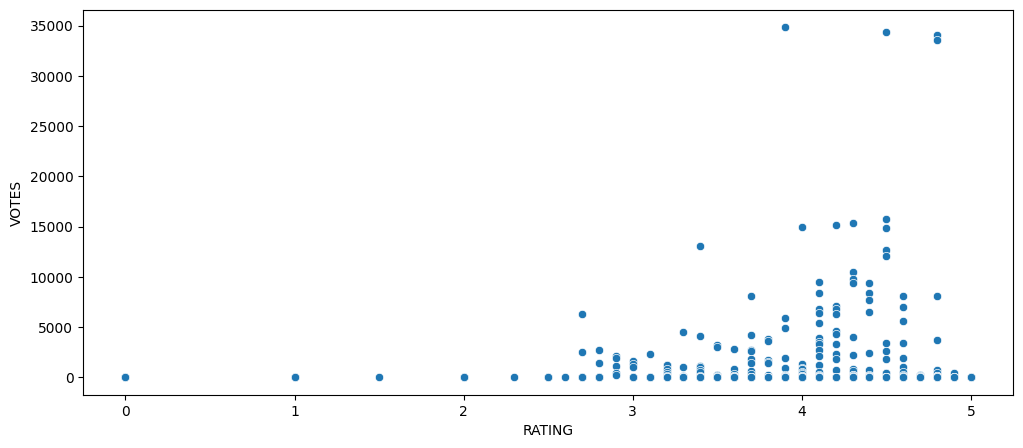

In [ ]:
plt.figure(figsize = (12,5))
sns.scatterplot(fandango,
                x = "RATING",
                y = "VOTES")
plt.show()

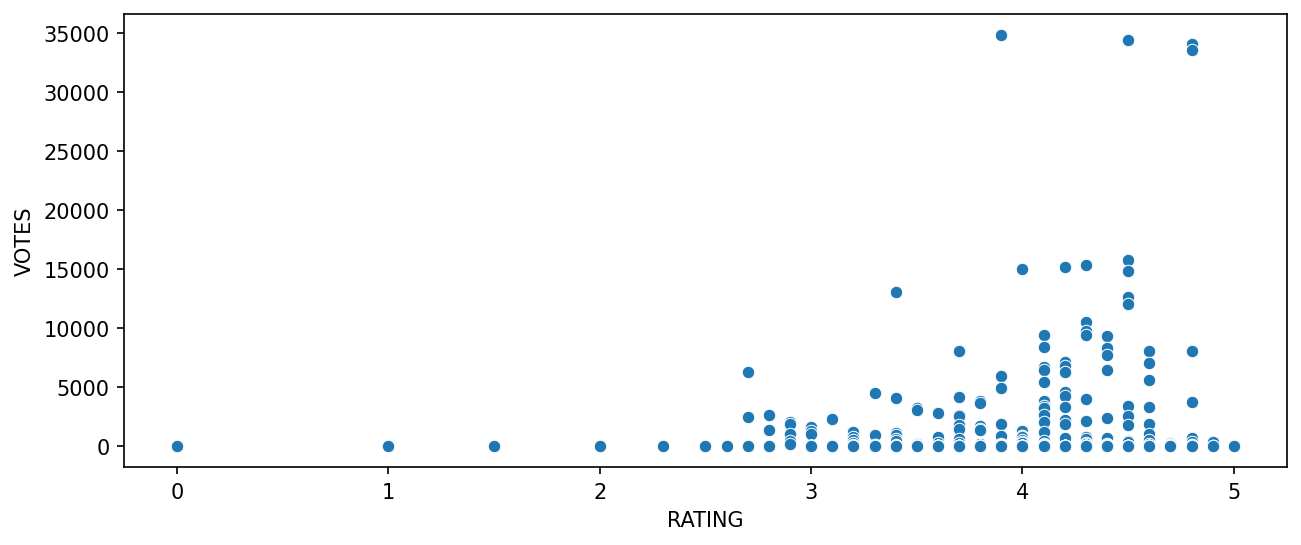

**TASK: Bütün columnlar arasındaki ilişkiye bakın**

In [ ]:
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**TASK: Bir şekilde 'Yıl' sütunu ekleyin**

In [ ]:
fandango["YEAR"] = fandango["FILM"].astype(str).str[-5:-1]
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015)
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015)
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015)
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964)


**TASK: Elimizdeki Fandango verilerinde yıl başına düşen film sayılarını bulun**

In [21]:
fandango.groupby('YEAR')['FILM'].count().sort_values(ascending=False)

YEAR
2015    478
2014     23
1964      1
2012      1
2016      1
Name: FILM, dtype: int64

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**TASK: Bir plot ile yıllara düşen film sayılarını görselleştirin:**

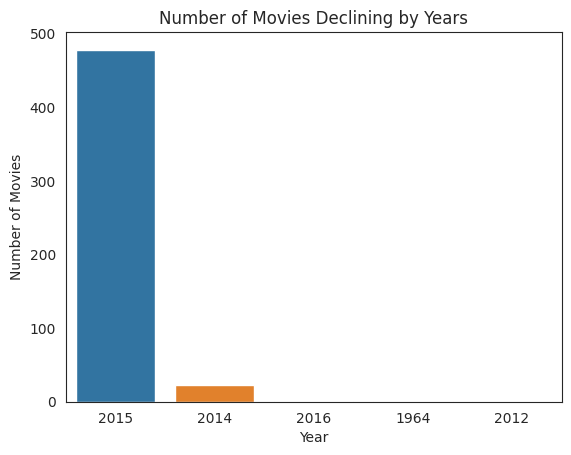

In [22]:
sns.countplot(x="YEAR", data=fandango)

plt.title('Number of Movies Declining by Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

<AxesSubplot:xlabel='YEAR', ylabel='count'>

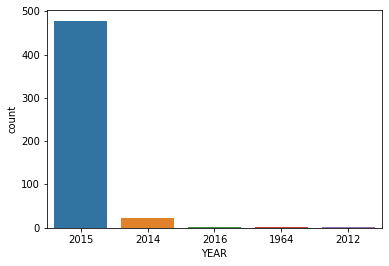

**TASK: En fazla oyu alan 10 film hangileridir?**

In [23]:
fandango.sort_values(by='VOTES', ascending=False).head(10)


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**TASK: Kaç tane film 0 vote'u aldı ?**

In [24]:
len(fandango[fandango['VOTES'] == 0])

69

69

**TASK: Sıfır oyu olan filmleri kaldırarak yalnızca incelenen filmlerin dataframe'ini oluşturun.**

In [25]:
fandango = fandango[fandango['VOTES'] != 0]

In [26]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


**TASK: Bazı filmlerde usulsüzlük yapıldığı ve kullanıcılara gösterilen STARS değerlerinin gerçek RATING değerlerinden biraz daha fazla çıktığı düşünüyoruz. 'STARS_DIFF' adında yeni bir column ekleyerek STARS ile RATING arasındaki farkları bu column'da tutun.**

In [27]:
fandango = fandango.assign(STARS_DIFF = fandango['STARS'] - fandango['RATING'])

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**TASK: STARS_DIFF sütunundaki verilerin kaçar kez oluştuğunu count edin ve plotlayın**

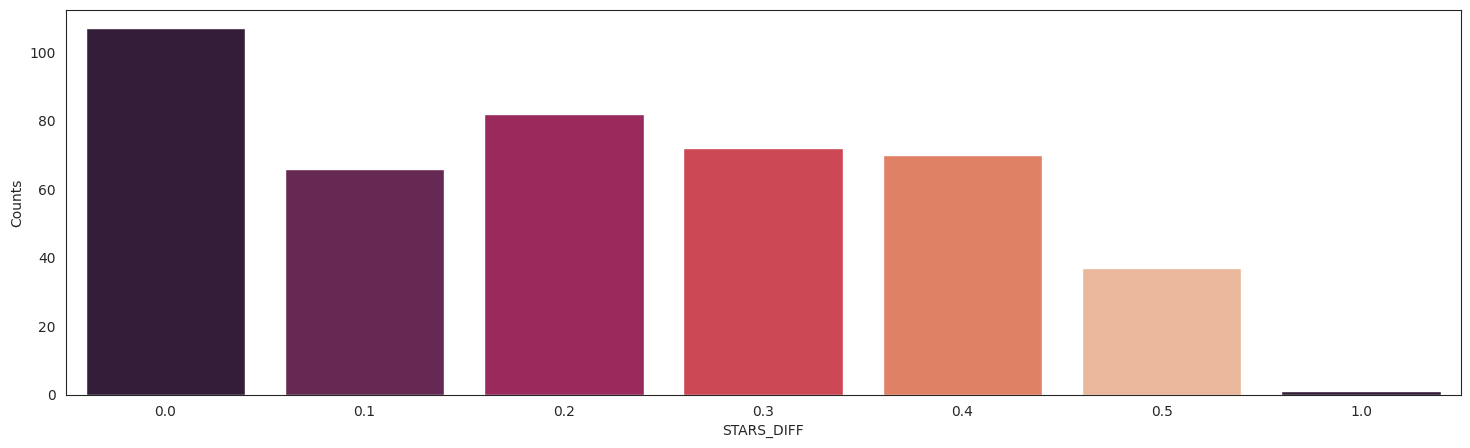

In [31]:
sns.set_style("white")
custom_palette = sns.color_palette("rocket")
plt.figure(figsize=(18,5))
sns.countplot(x=fandango['STARS_DIFF'].round(2), palette=custom_palette)
plt.xlabel('STARS_DIFF')
plt.ylabel('Counts')
plt.show()

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

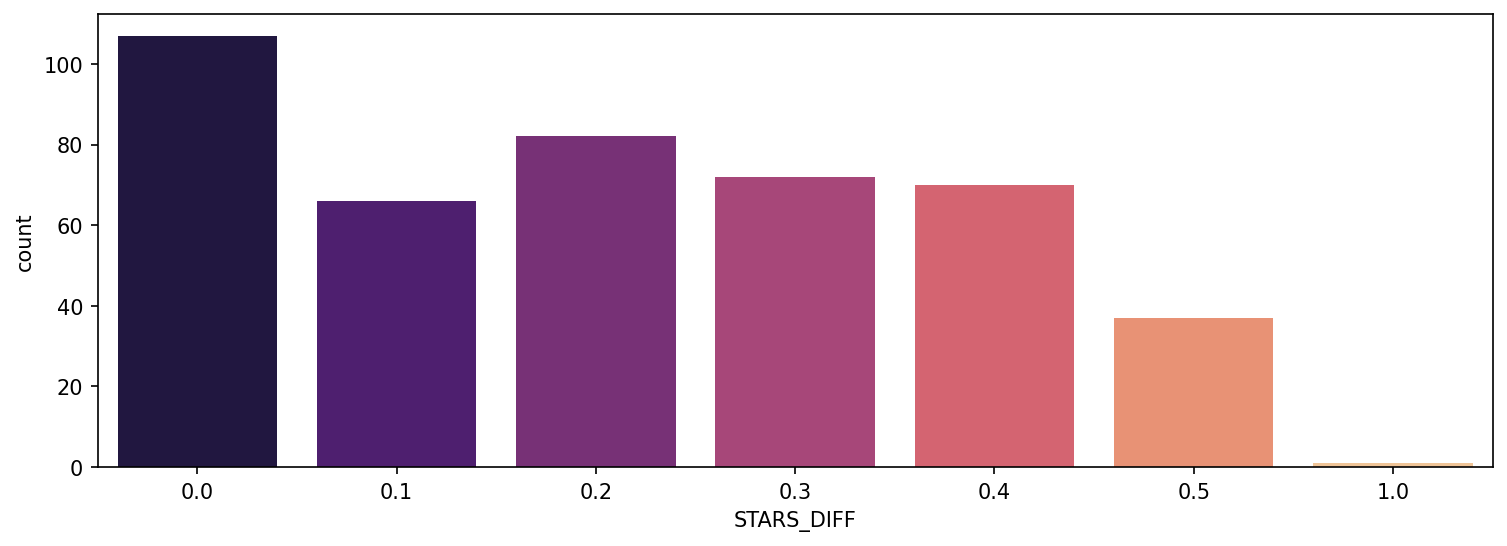

**TASK Üstteki plot'dan gördüğümüz üzere STARS_DIFF'i 1 olan film bile var. Bu çok yoğun usulsüzlük yapılan filmi getirin ve inceleyelim.**

In [32]:
fandango[(fandango["STARS_DIFF"]==1)]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Fandango Puanlamalarını Başka Sitelerle Karşılaştıralım

**TASK: "all_sites_scores.csv" dosyasını okuyun**

In [33]:
all_sites = pd.read_csv("all_sites_scores.csv")

**TASK: Bu csv dosyasını da keşfetmek için temel analiz başlangıcı kodlarını yazın.**

In [34]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [35]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [36]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Önce Rotten Tomatoes'i inceleyelim. RottenTomatoes adında gerçek yorumcuların derecelendirmeleri ve RottenTomatoes_User adında kullanıcıların derecelendirmelerini içeren bir sütun bulunuyor. Bu sütunları plot edelim.

**TASK: Aşağıdaki gibi bir scatterplot oluşturun.**

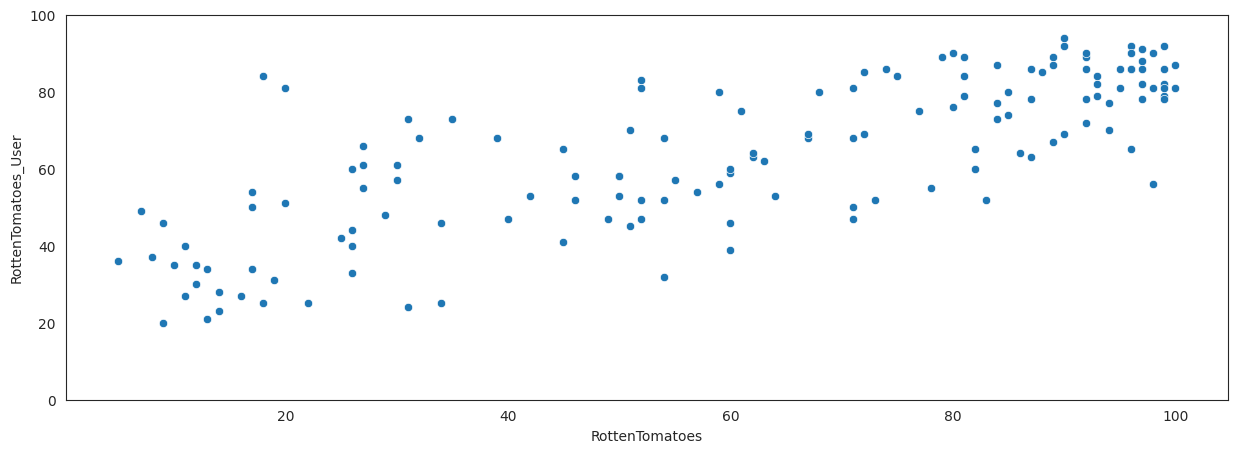

In [37]:
plt.figure(figsize = (15,5))
sns.scatterplot(data=all_sites, x="RottenTomatoes", y="RottenTomatoes_User")
plt.ylim(0, 100)
plt.show()

(0.0, 100.0)

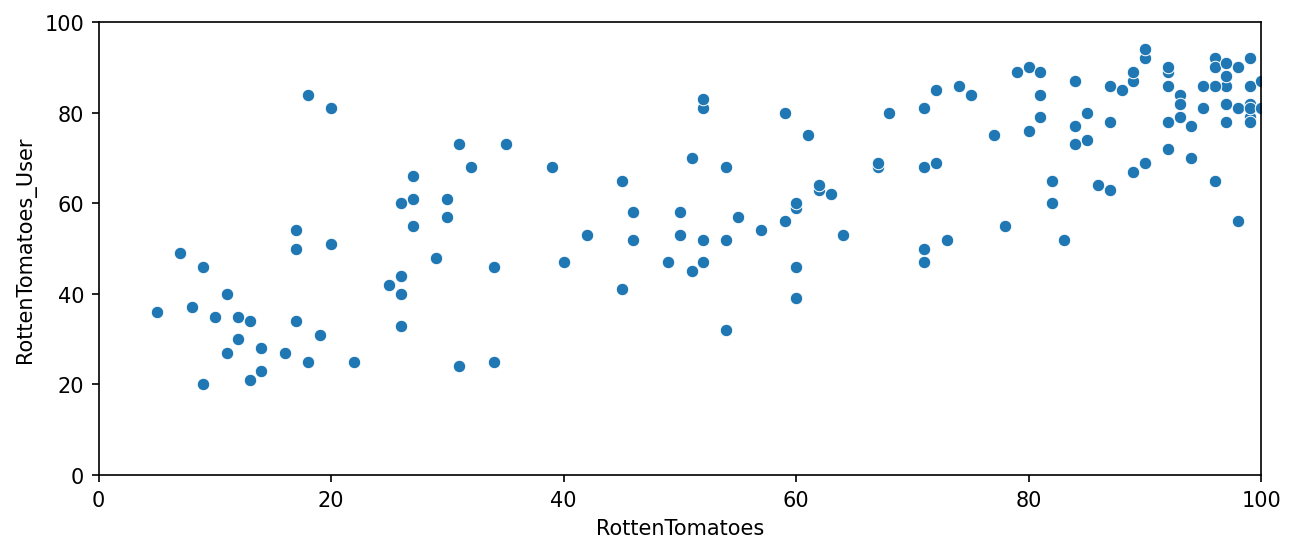

**TASK: Rotten DIFF adında bir column oluşturun ve bu column RottenTomatoes-RottenTomatoes_User bilgilerinden oluşsun.**

In [38]:
all_sites["Rotten DIFF"] = all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"]

In [39]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten DIFF
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


**TASK: RT Eleştirmen Puanı ile RT Kullanıcı Puanı arasındaki farkların dağılımını çizin. Bu dağılım grafiğinde negatif değerler olmalıdır. Bu dağıtımı görüntülemek için KDE veya Histogramları kullanabilirsiniz**

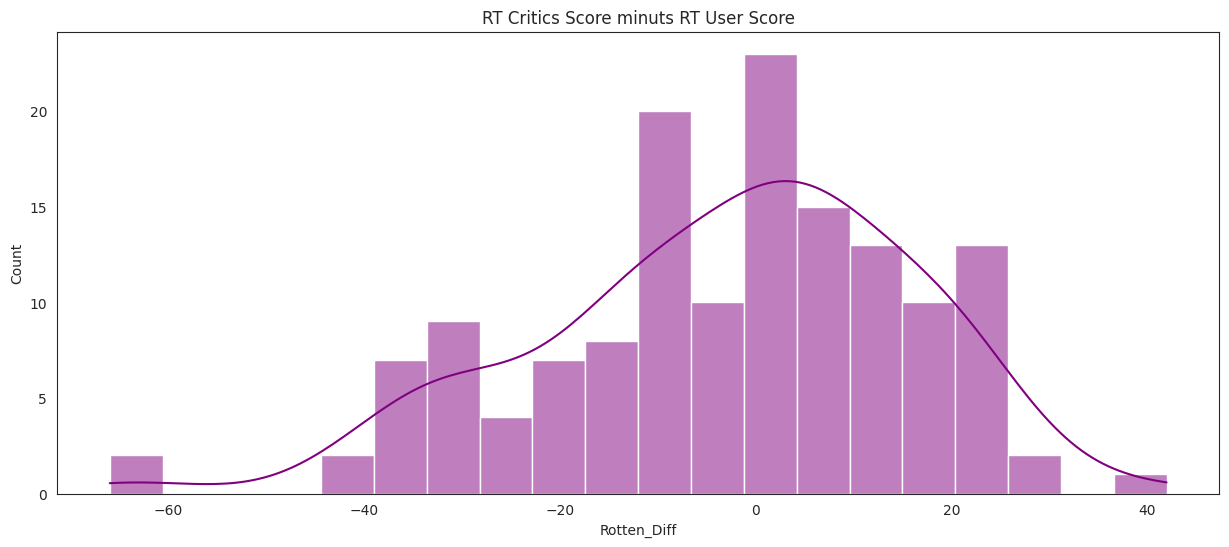

In [40]:
plt.figure(figsize=(15, 6))
sns.histplot(data=all_sites, x='Rotten DIFF', color='purple', bins=20, kde=True)
plt.xlabel('Rotten_Diff')
plt.ylabel('Count')
plt.title('RT Critics Score minuts RT User Score')
plt.show()


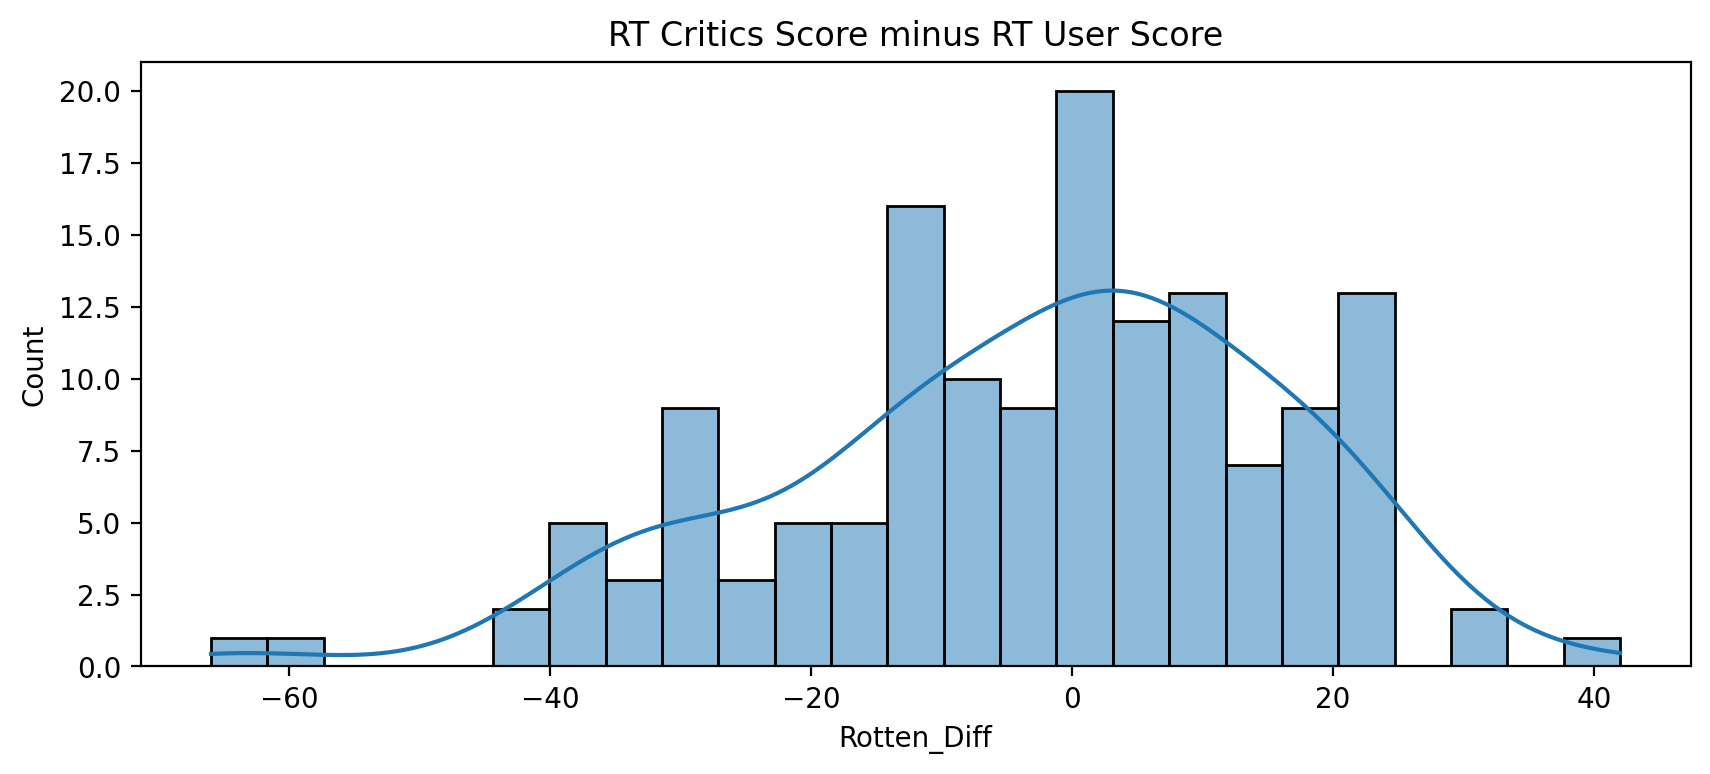

**Hadi Kullanıcı ile eleştirmen puanlamaları arasındaki farkın(Rotten_Diff) en yüksek ve en düşük olduğu filmlere bi bakalım.**

**TASK: Ortalama olarak kullanıcıların, eleştirmenlerden daha fazla sevdiği 5 filmi getirin.**

In [41]:
print("Users Love but Critics Hate")
all_sites[["FILM", "Rotten DIFF"]].sort_values("Rotten DIFF").head(5)

Users Love but Critics Hate


,FILM,Rotten DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**TASK: Şimdi de tam tersi, kullanıcıların eleştirmenlerden bile daha çok sevmediği 5 filmi getirin**

In [42]:
print("Critics love, but Users Hate")
all_sites[["FILM", "Rotten DIFF"]].sort_values("Rotten DIFF", ascending = False).head(5)

Critics love, but Users Hate


,FILM,Rotten DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Burdan sonraki analizlerde sizi özgür bırakıyoruz. İstediğiniz her şeye bakabilir her türlü incelemeyi ve plot'u çizdirebilirsiniz. Ve en sonunda ulaşmanızı istediğimiz bir sonuç var. *Fandango* sitesi kullanıcıları film puanlamaları konusunda kayda değer ölçüde kandırıyor çünkü .... şeklinde bir karara varmanız ya da *Fandango* sitesi diğer sitelere benzer bir tutum sergiliyor ve herhangi bir yanlış yönlendirme yapmıyor çünkü .... şeklinde bir karara varmanız. 

Varacağınız bu kararı maddeler ve kanıtlar halinde notebook'unuzun en altında mantıklı bir şekilde delilleriyle açıklayın. Burada hangi karara varırsanız varın önemli olan ve bizim de EmKa Academy olarak dikkat edeceğimiz şey, ulaştığınız kararı düzgün bir şekilde açıklayabiliyor musunuz ? Asıl odaklandığımız nokta sonuçtan ziyade bu. O yüzden en altta maddeler halinde kararınızı açıklarken dikkatli davranın. 

# BAŞARILAR

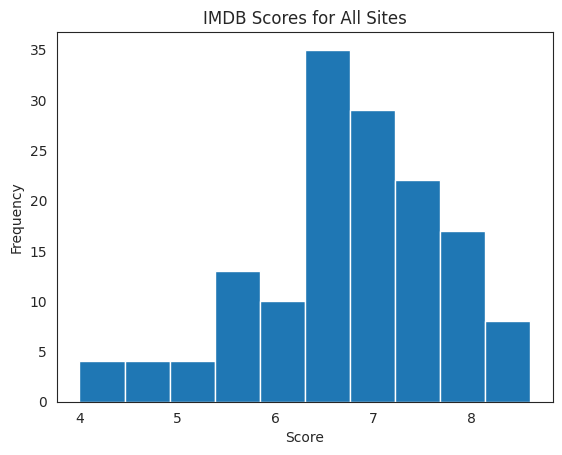

In [43]:
# all_sites_scores için histogram
plt.hist(all_sites["IMDB"], bins=10)
plt.title("IMDB Scores for All Sites")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [72]:
print('All sites ratings:')
print(all_sites[['RottenTomatoes', 'Metacritic', 'IMDB']].describe())

All sites ratings:
       RottenTomatoes  Metacritic        IMDB
count      146.000000  146.000000  146.000000
mean        60.849315   58.808219    6.736986
std         30.168799   19.517389    0.958736
min          5.000000   13.000000    4.000000
25%         31.250000   43.500000    6.300000
50%         63.500000   59.000000    6.900000
75%         89.000000   75.000000    7.400000
max        100.000000   94.000000    8.600000


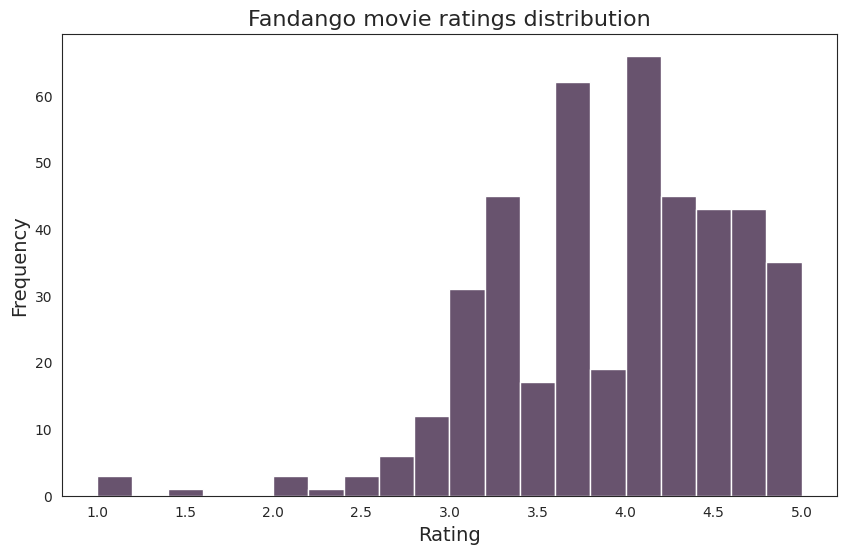

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=fandango, x='RATING', bins=20)
plt.title('Fandango movie ratings distribution', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


🔴Burada votes sayısı arttıkça stars değerlerinin artıp artmadığını ve yüksek stars değerlerinin düşük votes sayılarına sahip filmlerde daha sık görüldüğünü görsebiliriz.

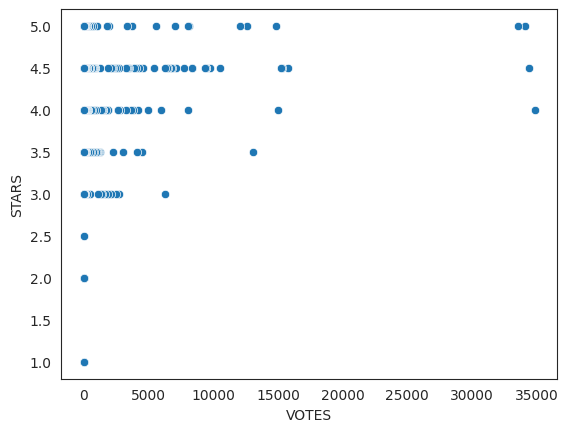

In [50]:
votes_stars = fandango[['VOTES', 'STARS']]
sns.scatterplot(data=votes_stars, x="VOTES", y="STARS")
plt.show()

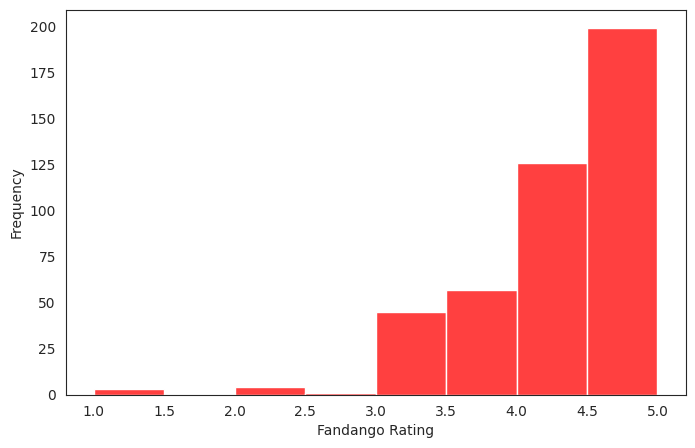

In [54]:
#Öncelikle, Fandango'nun 2015 ve 2016 yıllarındaki filmler için verdiği puanların dağılımını inceleyelim:

plt.figure(figsize=(8,5))
sns.histplot(data=fandango, x='STARS', binwidth=0.5, color='#FF0000')
plt.xlabel('Fandango Rating')
plt.ylabel('Frequency')
plt.show()

Bu kodu çalıştırdığımızda, Fandango'nun 2015 ve 2016 yıllarındaki filmler için verdiği puanların büyük ölçüde 3.5 ve üstü olduğunu görebiliriz. Bu da Fandango'nun puanlama sisteminin diğer sitelere göre daha yüksek puanlar vermeye yatkın olduğunu gösterir.

İlk olarak, Rotten Tomatoes, Metacritic ve IMDb puanlarının dağılımlarını histogram ile görselleştirelim.

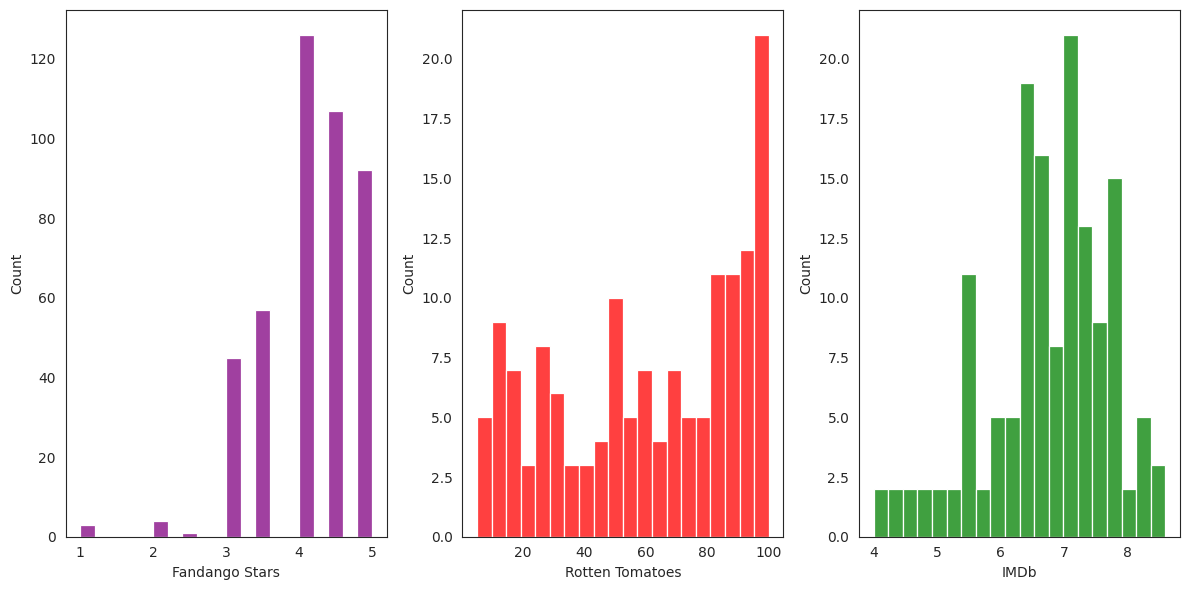

In [57]:
fig, ax = plt.subplots(figsize=(12,6), ncols=3)
sns.histplot(fandango['STARS'], bins=20, color='purple', ax=ax[0])
sns.histplot(all_sites['RottenTomatoes'], bins=20, color='red', ax=ax[1])
sns.histplot(all_sites['IMDB'], bins=20, color='green', ax=ax[2])
ax[0].set_xlabel('Fandango Stars')
ax[1].set_xlabel('Rotten Tomatoes')
ax[2].set_xlabel('IMDb')
plt.tight_layout()
plt.show()

Bu kod, Rotten Tomatoes, Metacritic ve IMDb puanlarının histogramlarını yatay olarak yan yana çizdirir. Bu şekilde, puanların dağılımını ve belirli bir değerin sıklığını gözlemleyebiliriz.

Daha sonra, farklı puanlama sitelerinin puanları arasındaki farkları daha net görmek için bir box plot çizdirelim.

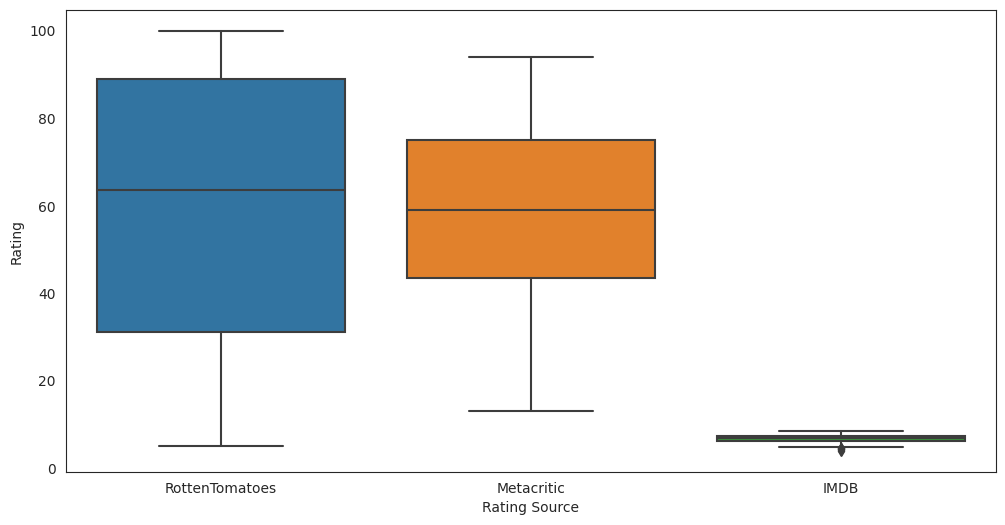

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(data=all_sites[['RottenTomatoes', 'Metacritic', 'IMDB']])
plt.xlabel('Rating Source')
plt.ylabel('Rating')
plt.show()


Aşağıda, Fandango'nun kendi sitesindeki film puanlarıyla, diğer film değerlendirme sitelerindeki puanları karşılaştıran bir grafik bulunmaktadır. Grafikte görüldüğü gibi, Fandango'nun kendi sitesindeki filmler genellikle diğer sitelerden çok daha yüksek puan almaktadır.

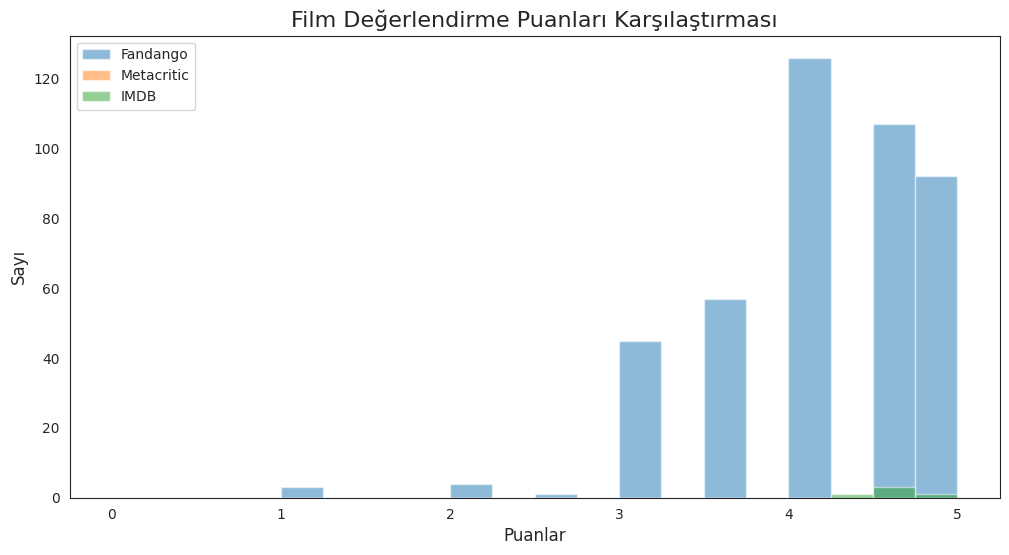

In [60]:
plt.figure(figsize=(12,6))
plt.hist(fandango['STARS'], bins=20, range=(0,5), alpha=0.5, label='Fandango')
plt.hist((all_sites['Metacritic'] + all_sites['Metacritic_User'])/2, bins=20, range=(0,5), alpha=0.5, label='Metacritic')
plt.hist((all_sites['IMDB'] + all_sites['IMDB_user_vote_count']/all_sites['IMDB_user_vote_count'].max()*5), bins=20, range=(0,5), alpha=0.5, label='IMDB')
plt.legend(loc='upper left')
plt.title('Film Değerlendirme Puanları Karşılaştırması', fontsize=16)
plt.xlabel('Puanlar', fontsize=12)
plt.ylabel('Sayı', fontsize=12)
plt.show()


Bu grafik, Fandango'nun kendi sitesindeki filmlerin genellikle diğer sitelerden daha yüksek puan aldığını göstermektedir. Bu nedenle, Fandango'nun kullanıcıları film puanlamaları konusunda yanılttığına dair şüphe bulunmaktadır.

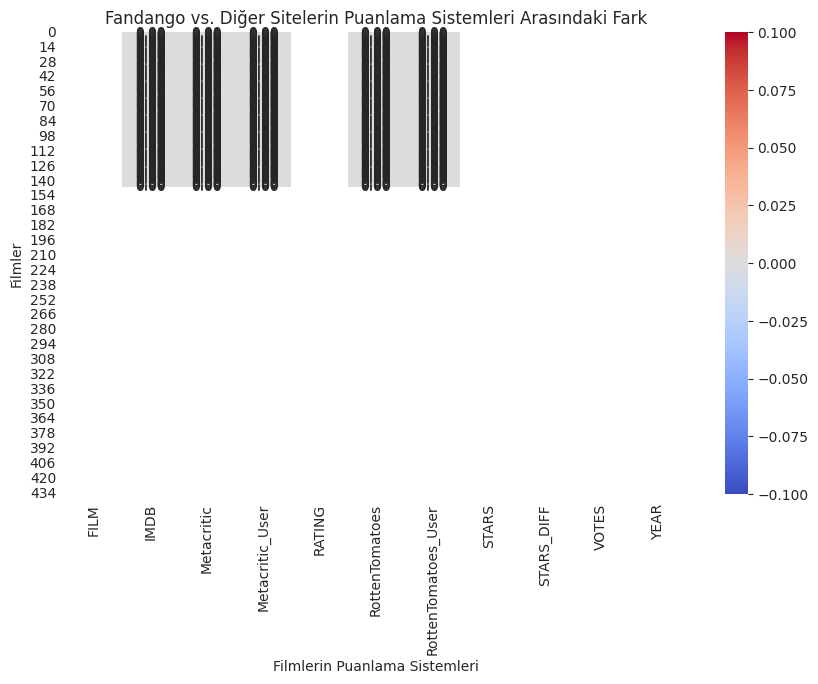

In [63]:
# İlgili sütunları seçme
all_sites_df = all_sites[['RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 
                             'Metacritic_User', 'IMDB']]

# Her bir sütundaki maksimum puanı alarak normalizasyon yapma
max_scores = all_sites_df.max()
all_sites_df = all_sites_df / max_scores

# Fandango ve diğer sitelerin verilerini birleştirme
merged_df = pd.concat([fandango, all_sites_df], axis=1)

# İkisi arasındaki farkı hesaplama
difference_df = merged_df - all_sites_df

# Heatmap oluşturma
plt.figure(figsize=(10,6))
sns.heatmap(difference_df, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Fandango vs. Diğer Sitelerin Puanlama Sistemleri Arasındaki Fark')
plt.xlabel('Filmlerin Puanlama Sistemleri')
plt.ylabel('Filmler')
plt.show()

Bu kod, Rotten Tomatoes ve Metacritic kullanıcı puanlarının yoğunluk grafiğini çizer. Bu grafiği inceleyerek, iki sitedeki kullanıcı puanları arasındaki farkları daha iyi anlayabiliriz.

<ipython-input-71-2c8672ae58e7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_sites['RottenTomatoes_User'], shade=True, label="Rotten Tomatoes User Scores", ax=ax)
<ipython-input-71-2c8672ae58e7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(all_sites['Metacritic_User'], shade=True, label="Metacritic User Scores", ax=ax)


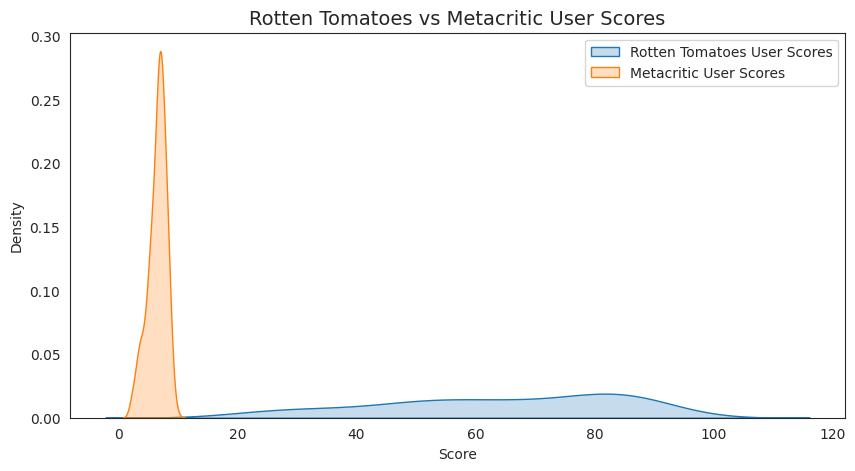

In [71]:
# Rotten Tomatoes ve Metacritic kullanıcı puanlarının karşılaştırılması
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(all_sites['RottenTomatoes_User'], shade=True, label="Rotten Tomatoes User Scores", ax=ax)
sns.kdeplot(all_sites['Metacritic_User'], shade=True, label="Metacritic User Scores", ax=ax)
ax.set_title("Rotten Tomatoes vs Metacritic User Scores", fontsize=14)
ax.set_xlabel("Score")
ax.set_ylabel("Density")
plt.legend()
plt.show()


----